In [16]:
import numpy as np
import pandas as pd
import os
from rendering import renduFitness, renduModel


## Partie 01 : Modification des paramètres de l'équation diffusion par CMA-ES
### Auteurs : Milo et Mohamed
Dans cette partie nous présentons les résultats que nous avons obtenus durant l'étude d'une approche permettant l'optimisation des paramètres de réaction diffusion par un algorithme CMA-ES.
#### 1/Interface Simulateur et Mesures implémentées : 
Pour les besoins de la simulation nous avons développés et intégrer a notre code interface
qui nous permettait d'executer des simulations plusieurs fonctions permettant de calculer différentes mesures
caractérisant la structure de l'essaim.
Par exemple, une execution classique se fait comme suit : 

In [17]:
from Src.controllers.swarmDescriptor import swarmDescriptor
"""
Le paramètre précisé sert a distinguer 
le simulateur avec lequel on interragis
"""
SD = swarmDescriptor("morphogenesis")
SD.setTime(500)
SD.controller.withVisiblite(False)
SD.setTopology("pile")
SD.setNb_robots(150)
SD.executeSimulation()
SD.genererRendu()

debug :  /home/mohamed


FileNotFoundError: [Errno 2] No such file or directory: 'embedded_simulateurs/morphogenesis/kilombo.json'

Ensuite le calcul de plusieurs mesures a été implémenté : 

In [ ]:
#Calcul des shapes index des différents clusters
SD.clusteriser()
SD.shapeIndex()
for c in SD.clusters:
    print(c)
#Ceci permet de calculer le nombre de Turing Spot
SD.calculerTuringSpots(4)
SD.renduTuringSpot(restedespoints=True)
SD.calculerTuringSpots(2)
SD.renduTuringSpot(restedespoints=True)
#Utiliser 0 par seuil peut s'avérer utile pour visualiser les clusters
SD.calculerTuringSpots(0)
SD.renduTuringSpot(True)

#### 2/Algorithme évolutionnaire : 
A présent que l'interface et les mesures ont étés implémentés, nous pouvons essayer différentes façons de modifier 
les paramètres de l'équation de réaction diffusion.
Pour ce faire il faut déterminer 4 choses : 
* Paramètrage du CMA-ES
* Paramètrage de la simulation
* Fonction Fitness
* Structure du génotype (les variables a modifier) 

Nous allons aborder les trois aspects et leur impact sur l'optimisation de l'essaim de ce qui suivra.

##### a)Fonction Fitness (naivement): 
D'abord, nous allons étudier l'impact de la variation de la fonction fitness sur l'éxécution du CMA-ES
Nous fixerons naivement les paramètres de la simulation et le génotype serra composé de tous les paramètres
de l'équation de réaction diffusion.
Nous executons chaque algorithme sur 200 itérations puis nous affichons un rendu.

D'abord nous commençons par expérimenter l'utilisation du nombre de Turing Spots

debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
debug rez :  /home/mohamed/PycharmProjects/Projet_Kilobots
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 9 (seed=960953, Sat Mar 21 18:04:48 2020)


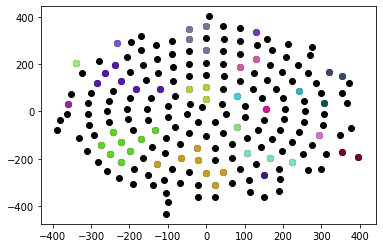

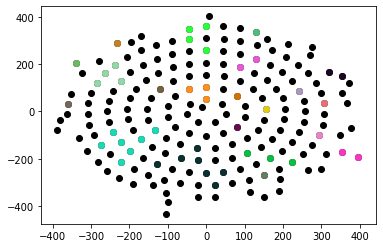

In [ ]:
renduFitness("Turing Spot",50,sigma = 0.001)

In [ ]:
renduFitness("Shape Index",20,sigma = 0.001)

Comme nous le voyons bien ça ne fonctionne pas, les variations des paramètres 
sont trop brutales pour pouvoir correctement altérer la fonction objectif de façon perceptible.
##### b)Structure du génotype : 
Pour remédier a ce problème nous avons d'abord pensé a modifier la structure du génotype, par exemple
nous pouvons considérer un genotype qui n'est pas composé des paramètres de la réaction mais seulement de la diffusion comme suit.